In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('./data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 데이터 EDA & 전처리

## 기본 데이터 확인

In [25]:
df.shape

(119390, 32)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 결측치 탐색

- 대표값이나 0 혹은 다른 값으로 대체

In [27]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [28]:
print(df['children'].nunique())
print(df['children'].unique())

5
[ 0.  1.  2. 10.  3. nan]


In [29]:
df.groupby('children', as_index=False)['agent'].count().sort_values(by='agent', ascending=False)

,children,agent
0,0.0,95149
1,1.0,4411
2,2.0,3429
3,3.0,58
4,10.0,1


In [30]:
print(df['country'].nunique())
print(df['country'].unique())

177
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' '

In [31]:
df.groupby(['country'], as_index=False)['agent'].count().sort_values(by='agent', ascending=False)

,country,agent
135,PRT,37593
59,GBR,10889
56,FRA,9810
51,ESP,7848
43,DEU,6998
...,...,...
96,LCA,1
89,KIR,1
148,SMR,0
150,STP,0


In [32]:
print(df['agent'].nunique())
print(df['agent'].unique())

333
[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  

In [33]:
df[df['agent']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [34]:
df[df['agent']==2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
182,Resort Hotel,0,258,2015,July,28,6,2,5,2,...,No Deposit,2.0,NaN,0,Contract,47.25,0,0,Check-Out,2015-07-13
208,Resort Hotel,1,292,2015,July,28,7,2,5,2,...,No Deposit,2.0,NaN,0,Contract,47.25,0,0,Canceled,2015-03-25
836,Resort Hotel,0,286,2015,July,31,31,2,2,1,...,No Deposit,2.0,NaN,0,Transient,57.60,0,0,Check-Out,2015-08-04
1608,Resort Hotel,0,356,2015,September,36,5,4,10,2,...,No Deposit,2.0,NaN,0,Contract,91.77,0,0,Check-Out,2015-09-19
1790,Resort Hotel,0,135,2015,September,38,14,8,20,2,...,No Deposit,2.0,NaN,0,Contract,82.00,0,0,Check-Out,2015-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109859,City Hotel,0,177,2017,April,15,15,2,1,2,...,No Deposit,2.0,NaN,0,Transient-Party,105.33,0,1,Check-Out,2017-04-18
109860,City Hotel,0,177,2017,April,15,15,2,1,2,...,No Deposit,2.0,NaN,0,Transient-Party,105.33,0,1,Check-Out,2017-04-18
109861,City Hotel,0,177,2017,April,15,15,2,1,2,...,No Deposit,2.0,NaN,0,Transient-Party,105.33,0,1,Check-Out,2017-04-18
111393,City Hotel,0,60,2017,May,19,7,2,1,2,...,No Deposit,2.0,NaN,0,Transient,106.00,0,0,Check-Out,2017-05-10


In [35]:
print(df['company'].nunique())
print(df['company'].unique())

352
[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 4

In [36]:
df[df['company']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [37]:
df[df['company']==9]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9713,Resort Hotel,1,12,2016,December,53,28,0,1,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Canceled,2016-12-27
13963,Resort Hotel,0,0,2016,February,6,2,0,2,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Check-Out,2016-02-04
13964,Resort Hotel,0,6,2017,January,4,24,0,2,1,...,No Deposit,NaN,9.0,0,Transient,35.00,0,1,Check-Out,2017-01-26
14306,Resort Hotel,0,1,2015,December,51,15,0,3,1,...,No Deposit,NaN,9.0,0,Transient,35.00,0,0,Check-Out,2015-12-18
14307,Resort Hotel,0,1,2016,February,6,2,0,2,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Check-Out,2016-02-04
14308,Resort Hotel,0,3,2016,April,15,4,1,0,1,...,No Deposit,NaN,9.0,0,Transient,42.00,0,0,Check-Out,2016-04-05
14309,Resort Hotel,0,5,2016,June,26,21,0,2,1,...,No Deposit,NaN,9.0,0,Transient,65.00,0,0,Check-Out,2016-06-23
14310,Resort Hotel,0,6,2016,October,43,18,0,2,1,...,No Deposit,NaN,9.0,0,Transient,54.00,0,0,Check-Out,2016-10-20
14311,Resort Hotel,0,3,2016,December,51,12,1,2,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Check-Out,2016-12-15
14312,Resort Hotel,0,6,2017,January,4,24,0,2,1,...,No Deposit,NaN,9.0,0,Transient,35.00,0,0,Check-Out,2017-01-26


In [38]:
# 결측치 대체
df['children'].fillna(0, inplace=True)
df['country'].fillna('none', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [39]:
df.isnull().sum().sum()

0

## 이상치 탐색 및 클래스 불균형

In [40]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [41]:
(df.describe() < 0).sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [42]:
len(df[df['adr'] < 0])

1

In [43]:
df.shape

(119390, 32)

In [44]:
df['adr'].nunique()

8879

In [45]:
df = df[df['adr'] >= 0]

In [46]:
df.shape

(119389, 32)

- 어디에 중점을 둘 것인지 정해야 한다.
    - 정상/취소/노쇼 각각 분리할 것인지 <= 선택 : 업샘플링 혹은 다운 샘플링 진행
    - 정상/취소 + 노쇼 binary 분류를 할 것인지 <= 선택 : 적절한 배분으로 클래스 불균형이 해소 될 것으로 판단

In [47]:
df['reservation_status'].value_counts()

Check-Out    75165
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [48]:
# 정상 비율
df['reservation_status'].value_counts()[0] / df['reservation_status'].value_counts().sum() * 100

62.95806146294885

In [49]:
# 취소 비율
df['reservation_status'].value_counts()[1] / df['reservation_status'].value_counts().sum() * 100

36.03095762591194

In [50]:
# 노쇼 비율
df['reservation_status'].value_counts()[2] / df['reservation_status'].value_counts().sum() * 100

1.0109809111392172

## 객실별 수요 파악

- 년/월 별

In [51]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40686
2015    21996
Name: arrival_date_year, dtype: int64

In [52]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9793
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [53]:
df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['agent'].count()

,arrival_date_year,arrival_date_month,agent
0,2015,August,3889
1,2015,December,2920
2,2015,July,2776
3,2015,November,2340
4,2015,October,4957
5,2015,September,5114
6,2016,April,5428
7,2016,August,5063
8,2016,December,3860
9,2016,February,3891


In [54]:
to_dicts = {'January' : '01.January',
            'February' : '02.February',
            'March' : '03.March',
            'April' : '04.April',
            'May' : '05.May',
            'June' : '06.June',
            'July' : '07.July',
            'August' : '08.August',
            'September' : '09.September',
            'October' : '10.October',
            'November' : '11.November',
            'December' : '12.December'}

In [55]:
df_res = df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['agent'].count()
df_res = df_res.replace(to_dicts)
df_res.sort_values(by=['arrival_date_year', 'arrival_date_month'])

,arrival_date_year,arrival_date_month,agent
2,2015,07.July,2776
0,2015,08.August,3889
5,2015,09.September,5114
4,2015,10.October,4957
3,2015,11.November,2340
1,2015,12.December,2920
10,2016,01.January,2248
9,2016,02.February,3891
13,2016,03.March,4824
6,2016,04.April,5428


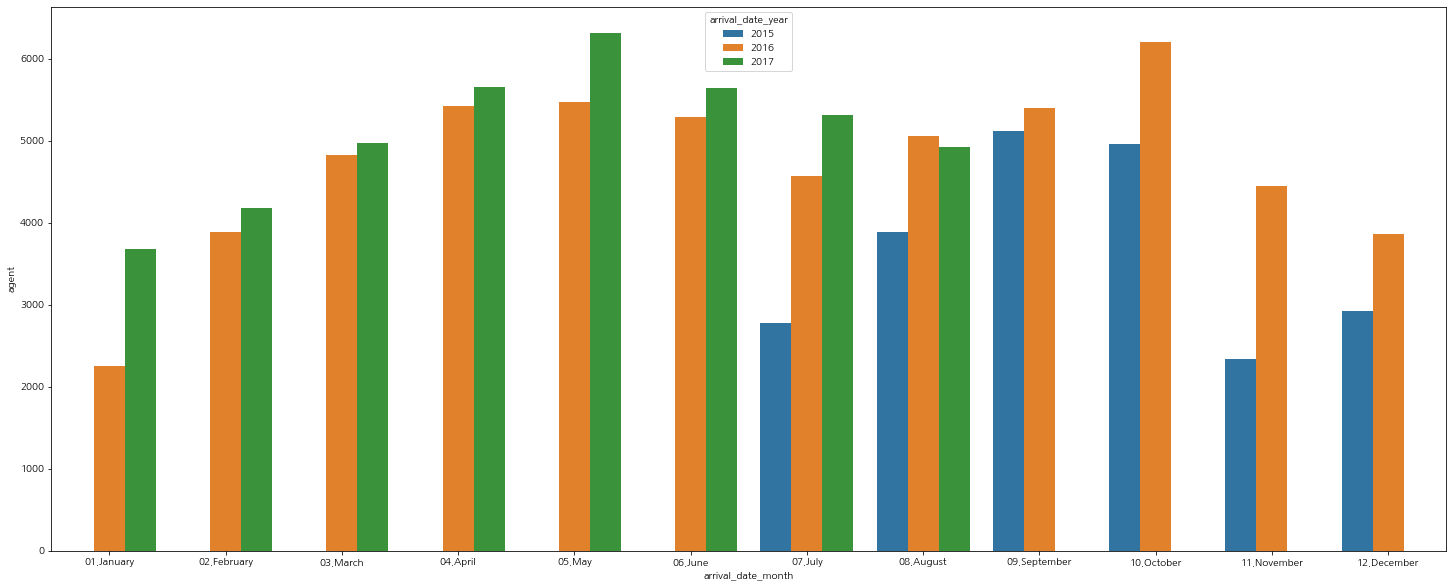

In [56]:
plt.figure(figsize=(25, 10))
sns.barplot(data=df_res, x='arrival_date_month', y='agent', hue='arrival_date_year', order=['01.January', '02.February', '03.March', '04.April', '05.May', '06.June', '07.July', '08.August', '09.September', '10.October', '11.November', '12.December'])
plt.show()

## 클래스 별 탐색

In [57]:
df['reservation_status'].value_counts()

Check-Out    75165
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64